Import pandas

In [1]:
import pandas as pd

Import numpy

In [66]:
import numpy as np
import seaborn as sbn
from datetime import datetime
import matplotlib.pyplot as plt

Import dataset

In [3]:
gens = pd.read_csv("/Users/georgekoliopoulos/Desktop/renewable_generators.csv")

In [4]:
gens.head()

,Unnamed: 0,id,generator_name,country,ic_kw,technology,subsidy,accreditation,commissioned,rlf,alf,latest_data,latest_mwh_p_a,latest_rocs_p_a
0,0,C00083RAEN,Drax Biomass Conversion,England,1295000,Dedicated biomass,RO,2003-03-01,2013-04-02,79.2%,68.4%,2018-03,7761720.0,7761720.0
1,1,INVDRX001,DRAX Biomass Conversion CfD,England,645000,Dedicated biomass,CfD,2016-12-21,2016-12-21,71.2%,73.0%,2018-06,4124530.0,NaN
2,2,R00021RPEN,London Array Offshore Windfarm,England,630000,Off-shore wind,RO,2012-11-04,2012-11-04,40.9%,41.3%,2018-04,2278850.0,4231750.0
3,3,R00080RAEN,Tilbury Dedicated Biomass Power Station,England,1131000,Dedicated biomass,RO,2002-08-01,1968-01-01,45.4%,62.4%,2013-08,4100710.0,5353980.0
4,4,R00032RPEN,Race Bank,England,573300,Off-shore wind,RO,2017-06-08,2017-06-08,NaN,NaN,2018-05,1869200.0,2774550.0


Delete the first column

In [5]:
gens.drop(gens.columns[[0]], 1, inplace=True)

Checking for missing values

In [6]:
gens.isnull().any()

id                 False
generator_name     False
country            False
ic_kw              False
technology         False
subsidy            False
accreditation       True
commissioned        True
rlf                 True
alf                 True
latest_data        False
latest_mwh_p_a      True
latest_rocs_p_a     True
dtype: bool

Deleting rows with missing values

In [7]:
gens=gens.dropna()

Check again for missing values

In [8]:
gens.isnull().any()

id                 False
generator_name     False
country            False
ic_kw              False
technology         False
subsidy            False
accreditation      False
commissioned       False
rlf                False
alf                False
latest_data        False
latest_mwh_p_a     False
latest_rocs_p_a    False
dtype: bool

Show the unique values of the technology column

In [9]:
gens.technology.unique()

array(['Dedicated biomass', 'Off-shore wind', 'Biomass co-firing',
       'On-shore wind', 'Hydro', 'Waste', 'Landfill Gas', 'Sewage Gas',
       'Photovoltaic', 'Anaerobic Digestion', 'Standard Gasification',
       'Advanced Gasification', 'Tidal Stream', 'Wave Power',
       'Enhanced Wave'], dtype=object)

Convert Accreditation column to datetime

In [18]:
gens['accreditation'] =  pd.to_datetime(gens['accreditation'], format='%Y-%m-%d')

In [19]:
england= gens.query('country=="England"')

In [20]:
england.head()

,id,generator_name,country,ic_kw,technology,subsidy,accreditation,commissioned,rlf,alf,latest_data,latest_mwh_p_a,latest_rocs_p_a
0,C00083RAEN,Drax Biomass Conversion,England,1295000,Dedicated biomass,RO,2003-03-01,2013-04-02,79.2%,68.4%,2018-03,7761720.0,7761720.0
2,R00021RPEN,London Array Offshore Windfarm,England,630000,Off-shore wind,RO,2012-11-04,2012-11-04,40.9%,41.3%,2018-04,2278850.0,4231750.0
3,R00080RAEN,Tilbury Dedicated Biomass Power Station,England,1131000,Dedicated biomass,RO,2002-08-01,1968-01-01,45.4%,62.4%,2013-08,4100710.0,5353980.0
5,R00014RPEN,Greater Gabbard,England,504000,Off-shore wind,RO,2011-02-23,2011-02-23,37.9%,43.2%,2018-05,1908480.0,3324630.0
7,R00083RAEN,"Drax Power Station (RB) - A,C,E",England,602397,Biomass co-firing,RO,2003-03-01,1974-01-01,76.9%,66.9%,2016-12,4631690.0,4168690.0


In [30]:
england.technology.value_counts()

Photovoltaic             848
Landfill Gas             384
On-shore wind            284
Sewage Gas               159
Dedicated biomass         96
Hydro                     71
Anaerobic Digestion       47
Standard Gasification     29
Advanced Gasification     28
Off-shore wind            24
Biomass co-firing         13
Waste                      5
Name: technology, dtype: int64

In [73]:
en_gen_by_year= england.groupby(england['accreditation'].dt.year)['technology'].value_counts()

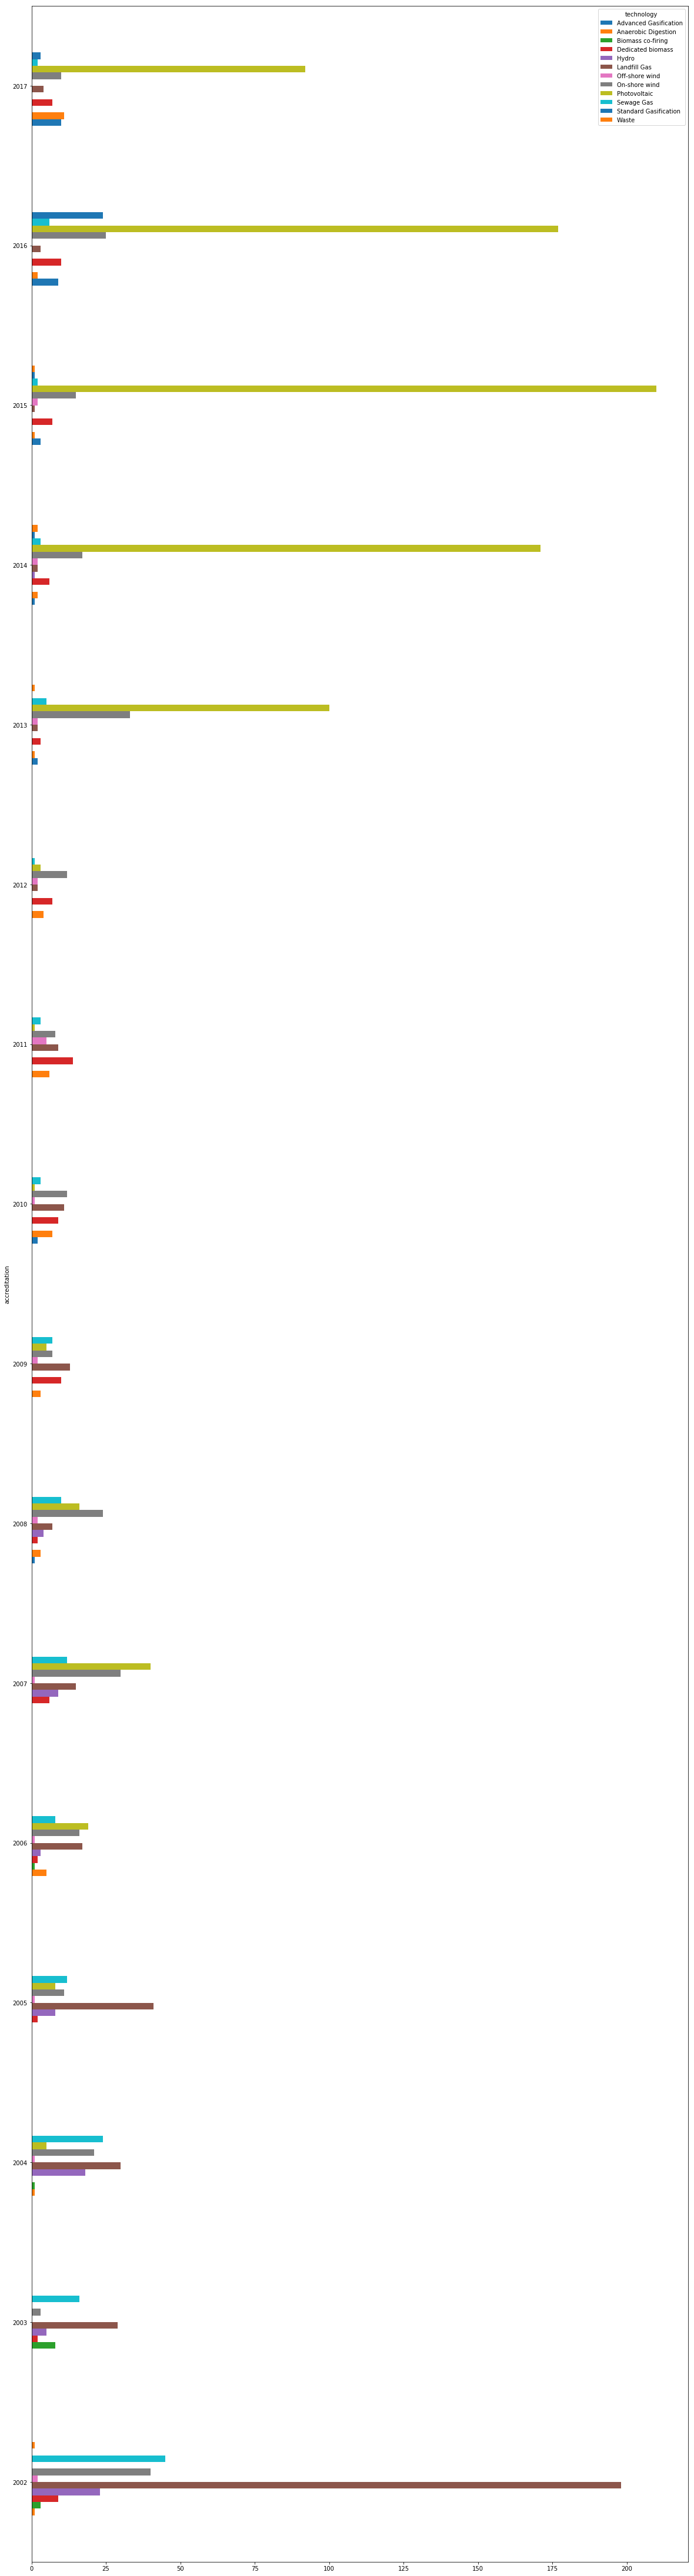

In [104]:
fig, ax = plt.subplots(figsize=(20,80))
en_gen_by_year.unstack().plot.barh(ax=ax)